In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_blobs
from sklearn.feature_selection import  f_classif
from sklearn import decomposition
from sklearn.cluster import KMeans,AgglomerativeClustering,MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score,calinski_harabasz_score
import scipy.cluster.hierarchy as sch
from itertools import cycle  # python自带的迭代器模块
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from scipy.stats.kde import gaussian_kde  # ,multivariate_normal

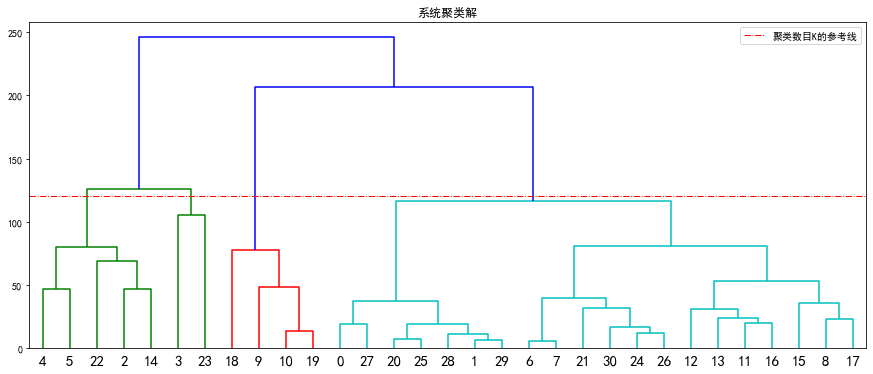

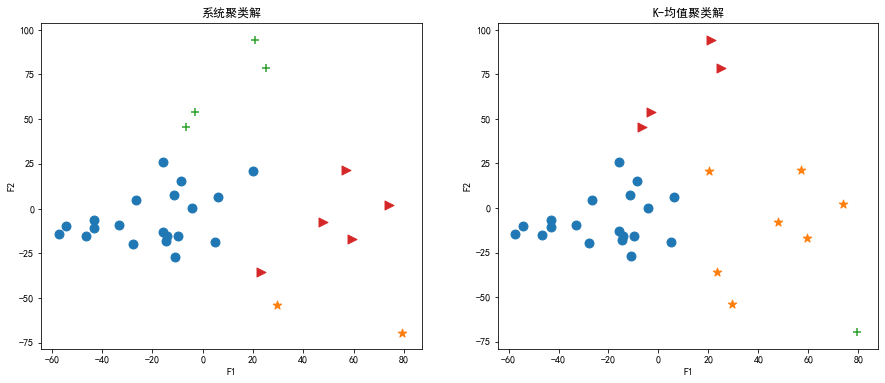

In [2]:
data=pd.read_csv('环境污染数据.txt',header=0)
X=data[['x1','x2','x3','x4','x5','x6']]
pca=decomposition.PCA(n_components=2,random_state=1)
pca.fit(X)
y=pca.transform(X)
fig=plt.figure(figsize=(15,6))
sch.dendrogram(sch.linkage(X, method='ward'),leaf_font_size=15,leaf_rotation=False)  
plt.axhline(y=120,color='red', linestyle='-.',linewidth=1,label='聚类数目K的参考线')
plt.title('系统聚类解')
plt.legend()

K=4
AC = AgglomerativeClustering(linkage='ward',n_clusters = K)
AC.fit(X)
lables = AC.labels_
fig=plt.figure(figsize=(15,6))
ax=plt.subplot(121)
markers=['o','*','+','>']
for k, m in zip(range(K),markers):
    ax.scatter(y[lables == k, 0], y[lables == k,1], marker=m,s=80)
ax.set_title('系统聚类解')
ax.set_xlabel("F1")
ax.set_ylabel("F2")

KM= KMeans(n_clusters=K,random_state=1)
KM.fit(X)
lables = KM.labels_
ax=plt.subplot(122)
for k, m in zip(range(K),markers):
    ax.scatter(y[lables == k, 0], y[lables == k,1], marker=m,s=80)
ax.set_title('K-均值聚类解')
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()


代码说明：
（1）第1，2行：读入环境污染数据。确定聚类变量。
（2）第3至5行：定义主成分分析对象，指定提取两个主成分。为后续高维聚类解的可视化做准备。
（3）第7行：采用基于ward联通性度量的系统聚类方法对数据进行聚类，并绘制聚类树形图。
（4）第8行：绘制确定聚类数目K的参考线。所得图形如图11.11所示上图所示。图形显示，聚成4类是比较合适的。
（5）第12行：指定聚类数目K=4。
（6）第13至15行：对数据进行系统聚类，并获得聚类解对象。
（7）第19至23行：借助主成分分析可视化聚类解：绘制关于两个主成分的散点图，不同颜色和形状的符号表示不同的小类。
（8）第25至27行：采用K-均值聚类，将数据聚成4类，并获得聚类解。
（9）第29至34行：借助主成分分析可视化聚类解：绘制关于两个主成分的散点图，不同颜色和形状的符号表示不同的小类。
